In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
plt.style.use("seaborn-v0_8")

from sklearn.model_selection import train_test_split

In [87]:
# Step - 1 Generate Toy(Dummy) Datasets
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std=3, centers=2, random_state=42)
n_features = 2
print(X.shape, y.shape)

(2000, 2) (2000,)


In [88]:
print(y)

[0 0 0 ... 1 0 1]


In [89]:
# Step - 2 Visualise Datasets
def visualise(X, y):
    plt.scatter(X[:, 0], X[:, 1],c=y, cmap="viridis")
    plt.show()

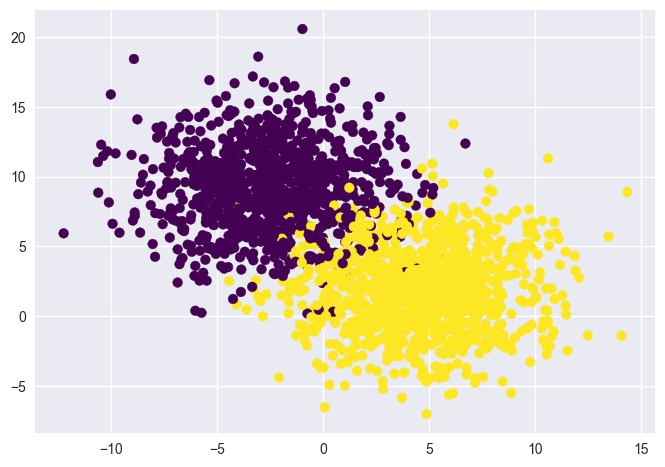

In [90]:
visualise(X, y)

In [91]:
# Step - 3
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)

    return (X - u) / std

In [92]:
X = normalise(X)

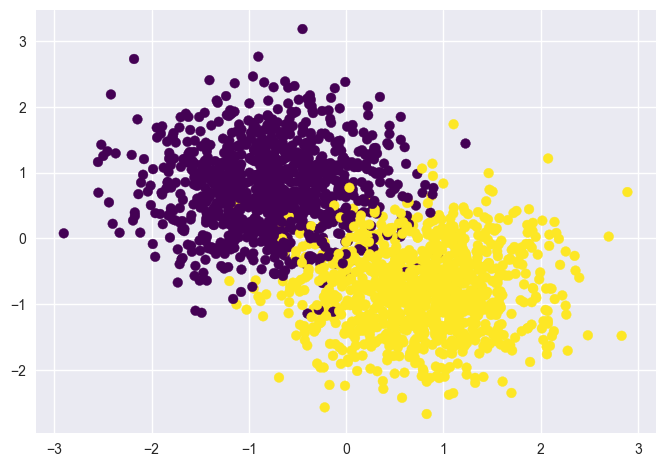

In [93]:
visualise(X, y)

In [94]:
# Step - 4 Train Test Split
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0)

print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


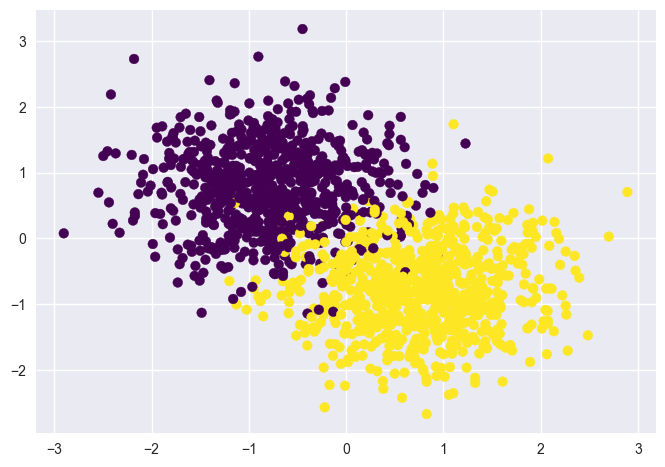

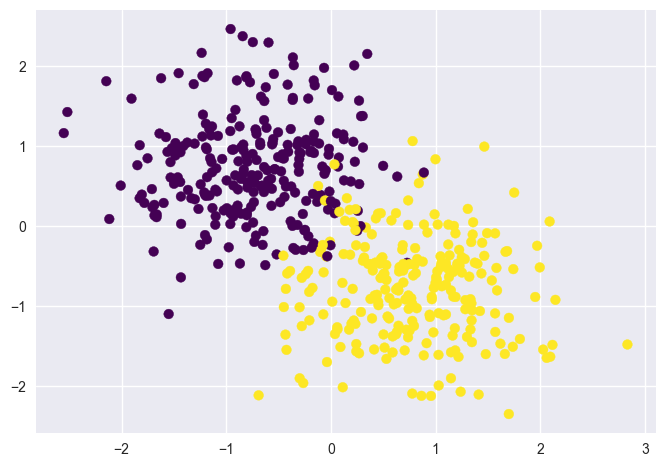

In [95]:
visualise(XT, yT)
visualise(Xt, yt)

In [96]:
# Model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# Binary Cross Entropy
def error(y, yp):
    loss = -np.mean(y * np.log(yp) + (1 - y)*np.log(1 - yp))
    return loss

def gradient(X, y, yp):
    m = X.shape[0]
    grad = -(1/m) * np.dot(X.T, (y - yp))
    return grad

def train(X, y, max_iters=100, learning_rate=0.1):
    #Randomly initialize theta
    theta = np.random.rand(n_features + 1, 1)
    error_list = []

    for i in range(max_iters):
        yp = hypothesis(X, theta)
        e = error(y, yp)
        error_list.append(e)
        grad = gradient(X, y, yp)

        theta = theta - learning_rate * grad

    plt.plot(error_list)
    return theta

def addExtraColumn(X):
    if X.shape[1] == n_features:
        ones = np.ones((X.shape[0], 1))
        x = np.hstack((ones, X))

    return x

def predict(X, theta):
    h = hypothesis(X, theta)
    pred = np.zeros((X.shape[0], 1), dtype='int')
    pred[h >= 0.5] = 1
    return pred

def accuracy(X, y, theta):
    pred = predict(X, theta)
    return ((y == pred).sum()) / y.shape[0]*100

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


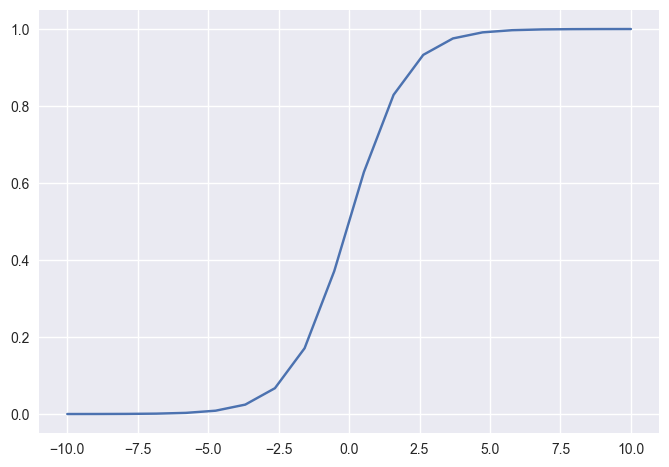

In [97]:
z = np.linspace(-10, 10, 20)
print(z)

plt.plot(z, sigmoid(z))
plt.show()

In [98]:
XT = addExtraColumn(XT)
print(XT)

[[ 1.         -1.43211741  0.65078613]
 [ 1.         -0.47100516  0.87372191]
 [ 1.         -0.40182883  2.1275269 ]
 ...
 [ 1.          0.02390726  0.74454457]
 [ 1.         -0.35936993  0.18771848]
 [ 1.          1.09360417 -1.10077065]]


In [99]:
Xt = addExtraColumn(Xt)
print(Xt)

[[ 1.         -1.17860853  1.9119189 ]
 [ 1.          0.70445084 -1.55536144]
 [ 1.          0.39063944 -0.10336496]
 ...
 [ 1.          1.96970601 -0.24632291]
 [ 1.         -0.80805197 -0.01411826]
 [ 1.          0.83964924  0.53655099]]


In [100]:
print(XT.shape)
print(yT.shape)

(1500, 3)
(1500,)


In [101]:
# converting them from a 1-dimensional array (vector) into a 2-dimensional array (matrix) where the first dimension has a variable length determined by the original array length, and the second dimension has a fixed length of 1.
yT = yT.reshape(-1, 1)
yt = yt.reshape(-1, 1)

In [102]:
print(yT.shape)
print(yt.shape)

(1500, 1)
(500, 1)


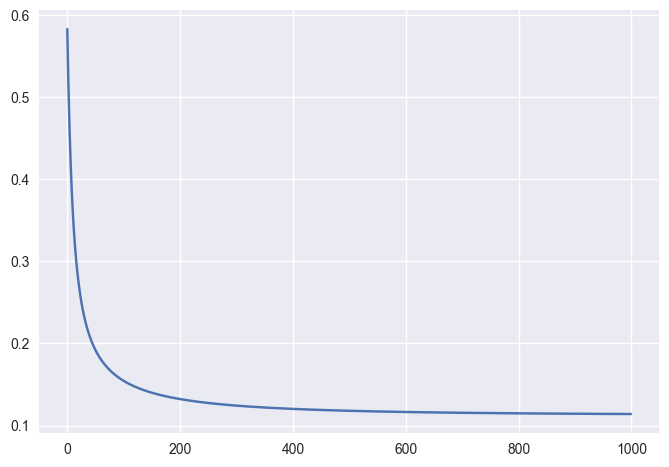

In [103]:
# Train
theta = train(XT, yT, max_iters=1000, learning_rate=0.2)

In [104]:
theta  #O0 + O1X1 + O2X2

array([[ 0.04898994],
       [ 3.14923054],
       [-3.55520731]])

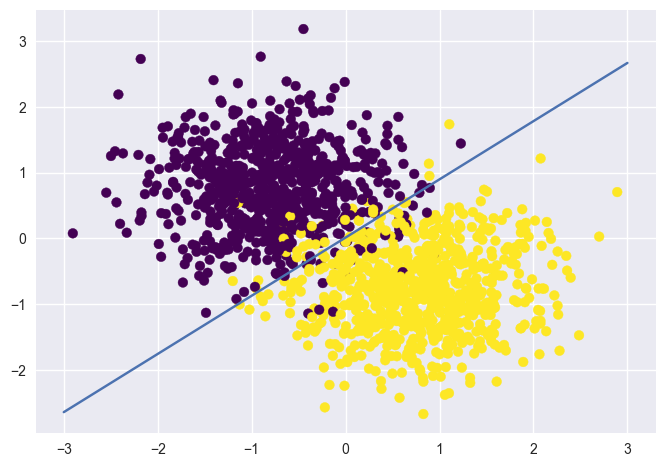

In [105]:
plt.scatter(XT[:, 1], XT[:, 2],c=yT, cmap="viridis")
x1 = np.linspace(-3, 3, 6)
x2 = -(theta[0] + theta[1] * x1) / theta[2]
plt.plot(x1, x2)
plt.show()

In [106]:
#Predictions

pred = predict(Xt, theta)

In [107]:
# Train Accuracy
accuracy(XT, yT, theta)

95.8

In [108]:
# Test Accuracy
accuracy(Xt, yt, theta)

96.2

In [109]:
# -------------- Using SKLearn Library ----------------
from sklearn.linear_model import LogisticRegression

In [110]:
# Create
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std=3, centers=2, random_state=42)
model = LogisticRegression()

In [111]:
# Training
model.fit(XT, yT)

c:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [112]:
# Predictions
model.predict(XT)

array([0, 0, 0, ..., 0, 0, 1])

In [113]:
# Scoring
model.score(XT, yT)

0.958

In [114]:
model.score(Xt, yt)

0.962

In [115]:
# --------- Multiclass Classificaation ---------
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std=3, centers=3, random_state=42)

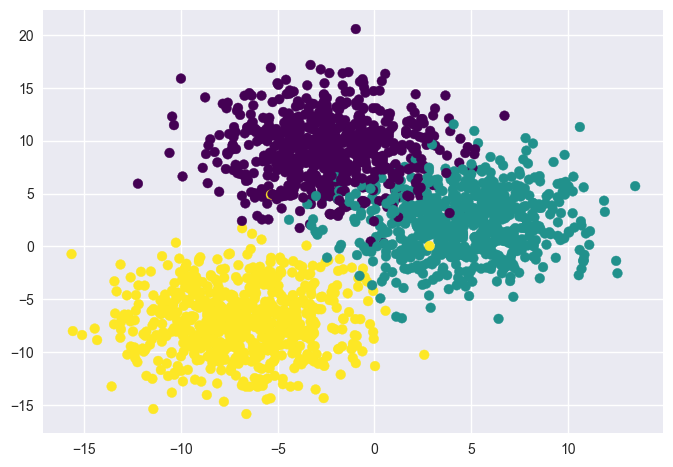

In [118]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [120]:
print(np.unique(y, return_counts=True)) # Labels

(array([0, 1, 2]), array([667, 667, 666], dtype=int64))


In [121]:
model = LogisticRegression(multi_class='ovr') # One vs Rest
model.fit(X, y)

LogisticRegression(multi_class='ovr')

In [122]:
model.predict(X)

array([1, 1, 1, ..., 1, 2, 1])

In [124]:
model.score(X, y)

0.9605